# Data cleaning from meteorological data - UFC Campus Quixadá
- This notebook present the data cleaning process process described in the following paper: Time Series Forecasting for Purposes of Irrigation Management Process.

Libs required

In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = 20, 10

warnings.filterwarnings('ignore')

In [8]:
exp = pd.read_csv('./dataset.csv', index_col='data', parse_dates=['data'])

In [9]:
exp.head(2)

,pressao_atm_max,pressao_atm_min,chuva_mm,temp_ar_max,temp_ar_min,umid_relat_max,umid_relat_min,rad_solar_total,temp_max,temp_min,temp_ar_media,umid_relat_media,vento_veloc,rad_solar_media,et0
data,,,,,,,,,,,,,,,
2017-01-01 00:00:00,619.9329,599.9176,0.0,25.936,25.426,81.828,78.974,1601.449,22.16899,22.00570,25.66374,80.65533,0.864792,4.448471,0.016252
2017-01-01 01:00:00,620.2747,599.7497,0.0,25.447,25.094,84.541,81.796,1566.530,22.36811,22.07685,25.24476,83.31339,0.746875,4.351471,0.012721


In [11]:
(exp['et0']).describe()

count    7948.000000
mean        0.043039
std         0.046288
min         0.000055
25%         0.003839
50%         0.023647
75%         0.071558
max         0.209839
Name: et0, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
ts = exp.resample("D").mean()

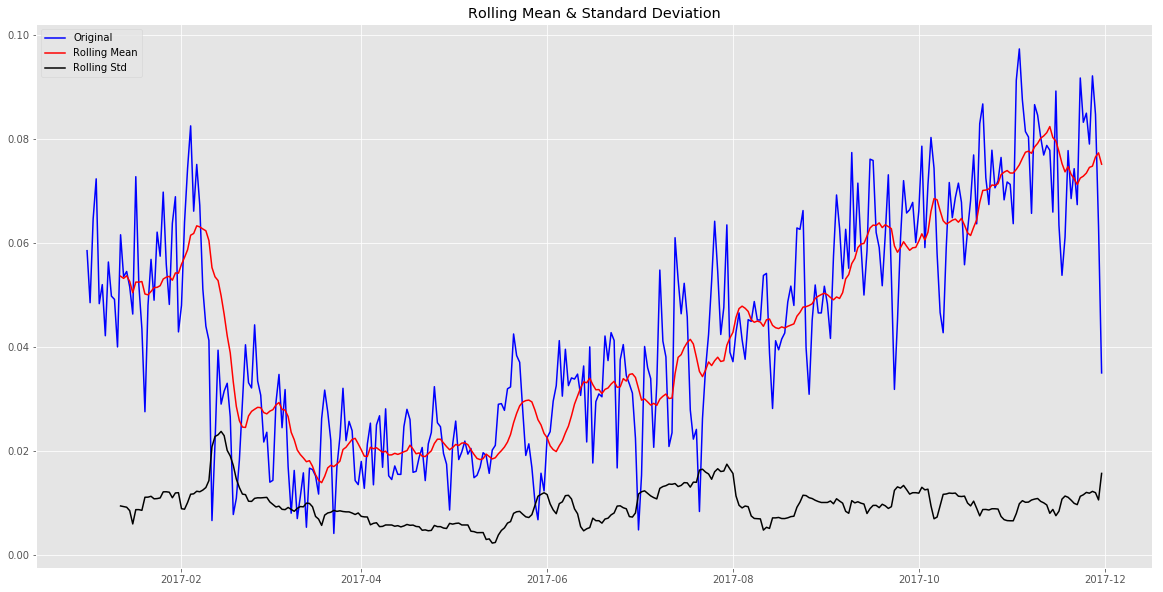

Results of Dickey-Fuller Test:
Test Statistic                  -1.321068
p-value                          0.619480
#Lags Used                       9.000000
Number of Observations Used    324.000000
Critical Value (1%)             -3.450695
Critical Value (5%)             -2.870502
Critical Value (10%)            -2.571545
dtype: float64


In [22]:
test_stationarity(ts.et0)